# Knowledge Exploration

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
pd.set_option('display.max_rows', 200)

## Load used entities

In [43]:
used_entities = pd.read_csv('used_entities_dataset.csv')
used_entities['method'] = used_entities['dataset'].str.strip()
print(len(used_entities[used_entities['probability'] > 0.5]))
print(len(used_entities[used_entities['probability'] <= 0.5]))
used_entities = used_entities[used_entities['probability'] > 0.5].drop(['probability', 'count', 'sentence', 'dataset'], axis=1)
used_entities

67235
31041


,document_id,method
0,2118681326,marcu
1,2118681326,machine translation
2,2118681326,penn treebank
3,2161668503,support vector
4,2161668503,pre7
...,...,...
98267,2788356904,engagement score
98272,2798515201,sparql
98273,2798515201,datasets
98274,2798515201,metaexp


### Preprocessing

#### 1.  Suffixes:
* bayesian inference algorithm => bayesian inference
* support vector machine classifier => support vector machine

In [44]:
# xxxx algorithm
used_entities['method'] = used_entities['method'].apply(
    lambda method: method[:method.rfind(" ")] if method.endswith(" dataset")\
                                                or method.endswith(" data set")\
                                                or method.endswith(" datasets")\
                                                or method.endswith(" data sets")\
                                              else method)
used_entities

,document_id,method
0,2118681326,marcu
1,2118681326,machine translation
2,2118681326,penn treebank
3,2161668503,support vector
4,2161668503,pre7
...,...,...
98267,2788356904,engagement score
98272,2798515201,sparql
98273,2798515201,datasets
98274,2798515201,metaexp


#### 2. Plural to singular:
* neural networks => neural network

In [45]:
# plural 2 singular: check if method ends with an "s" and if it does,
# check whether the df contains the method name without the "s".
# Warning: this might take a while...
method_series = used_entities['method'].unique()
print(len(method_series))
used_entities['method'] = used_entities['method'].apply(
    lambda method: method[:-2] if len(method) > 2 and method[-2] == "es" and method[:-2] in method_series\
                                else method[:-1] if method[-1] == "s" and method[:-1] in method_series\
                                else method)
used_entities

29274


,document_id,method
0,2118681326,marcu
1,2118681326,machine translation
2,2118681326,penn treebank
3,2161668503,support vector
4,2161668503,pre7
...,...,...
98267,2788356904,engagement score
98272,2798515201,sparql
98273,2798515201,dataset
98274,2798515201,metaexp


#### 3. Wikidata alias lookup:
* neural network => artificial neural network
* nn => artificial neural network
* svm => support vector machine
* lstm => long short-term memory

#### 4. Custom mappings:
* deep neural network dnn => deep neural network
* standard convolutional => convolutional neural network

In [70]:
used_entities['method'] = used_entities['method'].replace('conll2000', 'conll')
used_entities['method'] = used_entities['method'].replace('conll2003', 'conll')
used_entities['method'] = used_entities['method'].replace('english wikipedia', 'wikipedia')

#### 5. Custom filtering

In [71]:
filtered_df = used_entities.drop(
    used_entities[
           (used_entities['method'] == 'dataset')
         | (used_entities['method'] == 'although')
         | (used_entities['method'] == 'whereas')
         | (used_entities['method'] == 'the accuracy')
         | (used_entities['method'] == 'accuracy of')
         | (used_entities['method'] == 'characteristics of')
         | (used_entities['method'] == 'the accuracy of')
         | (used_entities['method'] == 'the accuracy of the')
         | (used_entities['method'] == 'input and')
         | (used_entities['method'] == 'keyword')
         | (used_entities['method'] == 'multi')
         | (used_entities['method'] == 'algorithm')
    ].index)
filtered_df

,document_id,method
0,2118681326,marcu
1,2118681326,machine translation
2,2118681326,penn treebank
3,2161668503,support vector
4,2161668503,pre7
...,...,...
98259,2885569354,chapmannkolmogorov equations
98265,2788356904,alternate hypothesis
98267,2788356904,engagement score
98272,2798515201,sparql


#### 6. Drop duplicates

In [72]:
unique_df = filtered_df.drop_duplicates()
unique_df

,document_id,method
0,2118681326,marcu
1,2118681326,machine translation
2,2118681326,penn treebank
3,2161668503,support vector
4,2161668503,pre7
...,...,...
98259,2885569354,chapmannkolmogorov equations
98265,2788356904,alternate hypothesis
98267,2788356904,engagement score
98272,2798515201,sparql


### Word Cloud

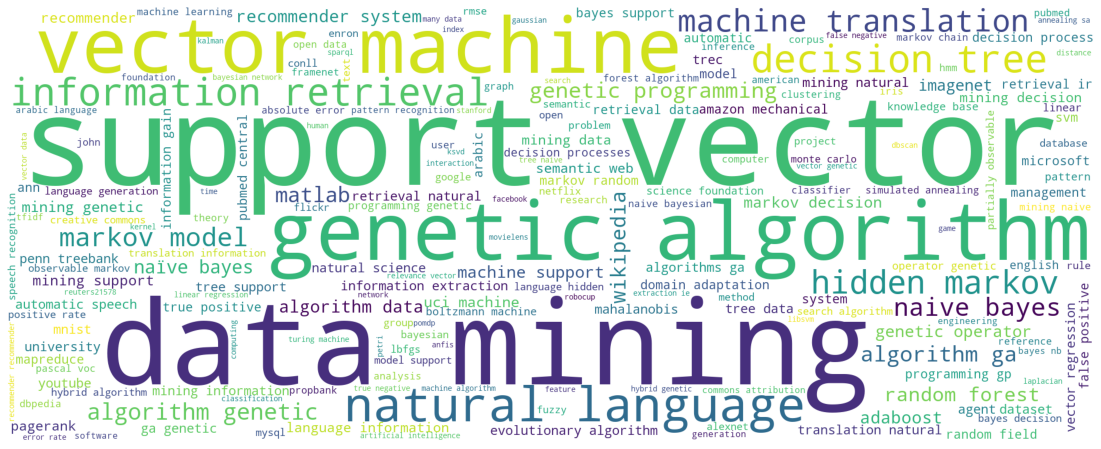

In [73]:
wc = WordCloud(background_color="white", width=2000, height=800)
wc.generate(' '.join(unique_df['method'].values))
plt.figure(figsize=(20, 8))
plt.axis('off')
plt.imshow(wc)
plt.show()

## Load MAG paper metadata

In [74]:
papers = pd.read_csv('papers.csv')
papers

,document_id,title,published_year,citation_count,original_venue,journal_name,journal_citation_count,journal_paper_count,conference_name,conference_citation_count,conference_paper_count
0,385572,A Generic Framework Based on Machine Learning ...,2005,1,working conference on virtual enterprises,NaN,NaN,NaN,Working Conference on Virtual Enterprises,5470.0,1253.0
1,728297,An Optimized Cost-Sensitive SVM for Imbalanced...,2013,50,pacific-asia conference on knowledge discovery...,NaN,NaN,NaN,Pacific-Asia Conference on Knowledge Discovery...,8461.0,1122.0
2,954605,Exploiting Trust and Suspicion for Real-time A...,2007,3,international conference on trust management,NaN,NaN,NaN,International Conference on Trust Management,5714.0,379.0
3,1543681,An Adequate Representation of Medical Data Bas...,2013,1,computer information systems and industrial ma...,NaN,NaN,NaN,Computer Information Systems and Industrial Ma...,2297.0,678.0
4,1632977,A Bayesian Strategy to Enhance the Performance...,2011,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25039,2889995140,Intelligent Model Conception Proposal for Adap...,2018,0,International Journal of Advanced Computer Sci...,International Journal of Advanced Computer Sci...,8438.0,4534.0,NaN,NaN,NaN
25040,2890772535,Multi-level temporal autoregressive modelling ...,2018,0,International Journal of Geographical Informat...,International Journal of Geographical Informat...,57466.0,2314.0,NaN,NaN,NaN
25041,2891610319,Artificial Neural Network based Weather Predic...,2018,0,International Journal of Advanced Computer Sci...,International Journal of Advanced Computer Sci...,8438.0,4534.0,NaN,NaN,NaN
25042,2893045341,pysster: classification of biological sequence...,2018,5,Bioinformatics,Bioinformatics,973342.0,13665.0,NaN,NaN,NaN


### Join document-ids from used entities onto MAG document-ids

In [75]:
paper_years = papers[['document_id', 'published_year']]
entities_years = unique_df.merge(paper_years, on='document_id')
entities_years = entities_years[(2004 < entities_years['published_year']) & (entities_years['published_year'] < 2019)]
entities_years['count'] = 1
entities_years

,document_id,method,published_year,count
0,2118681326,marcu,2005,1
1,2118681326,machine translation,2005,1
2,2118681326,penn treebank,2005,1
3,2161668503,support vector,2005,1
4,2161668503,pre7,2005,1
...,...,...,...,...
59628,2885569354,chapmannkolmogorov equations,2018,1
59629,2788356904,alternate hypothesis,2018,1
59630,2788356904,engagement score,2018,1
59631,2798515201,sparql,2018,1


### Group by method and published year

In [76]:
df = entities_years.drop('document_id', axis=1).groupby(['method', 'published_year']).sum().reset_index().sort_values('published_year')
df = df[df['count'] >= 5]
df

,method,published_year,count
33254,support vector machine,2005,83
27296,propbank,2005,13
33218,support vector,2005,51
33583,swissprot,2005,6
33508,svms,2005,5
...,...,...,...
6930,creative commons attribution,2018,5
3641,boltzmann machine,2018,5
34134,tensorflow,2018,12
11418,flickr,2018,5


---
## 1. Find top used methods

In [77]:
top_methods = df.drop('published_year', axis=1).groupby('method').sum()
top_methods = top_methods.sort_values('count', ascending=False)
top_methods[:200]
top_methods

,count
method,
data mining,2190
natural language,1993
support vector machine,1968
genetic algorithm,1807
information retrieval,1092
decision tree,1050
support vector,679
machine translation,647
hidden markov model,441


### Select subset of entities

In [84]:
entities = ["wikipedia", "imagenet", "pubmed central", "mnist"]
#entities = ["genetic"]
            #"random forest", "decision tree"]#,
#            "natural language processing", "reinforcement learning"]
#entities = ["support vector machine", "random forest"]
data = df[df['method'].str.contains('|'.join(entities), regex=True)]
df[df['method'].str.contains('|'.join(entities), regex=True)].drop('published_year', axis=1).groupby('method').sum().sort_values('count', ascending=False)

,count
method,
wikipedia,255
imagenet,195
mnist,89
pubmed central,52


### Plot number of documents which used a specific entity over time

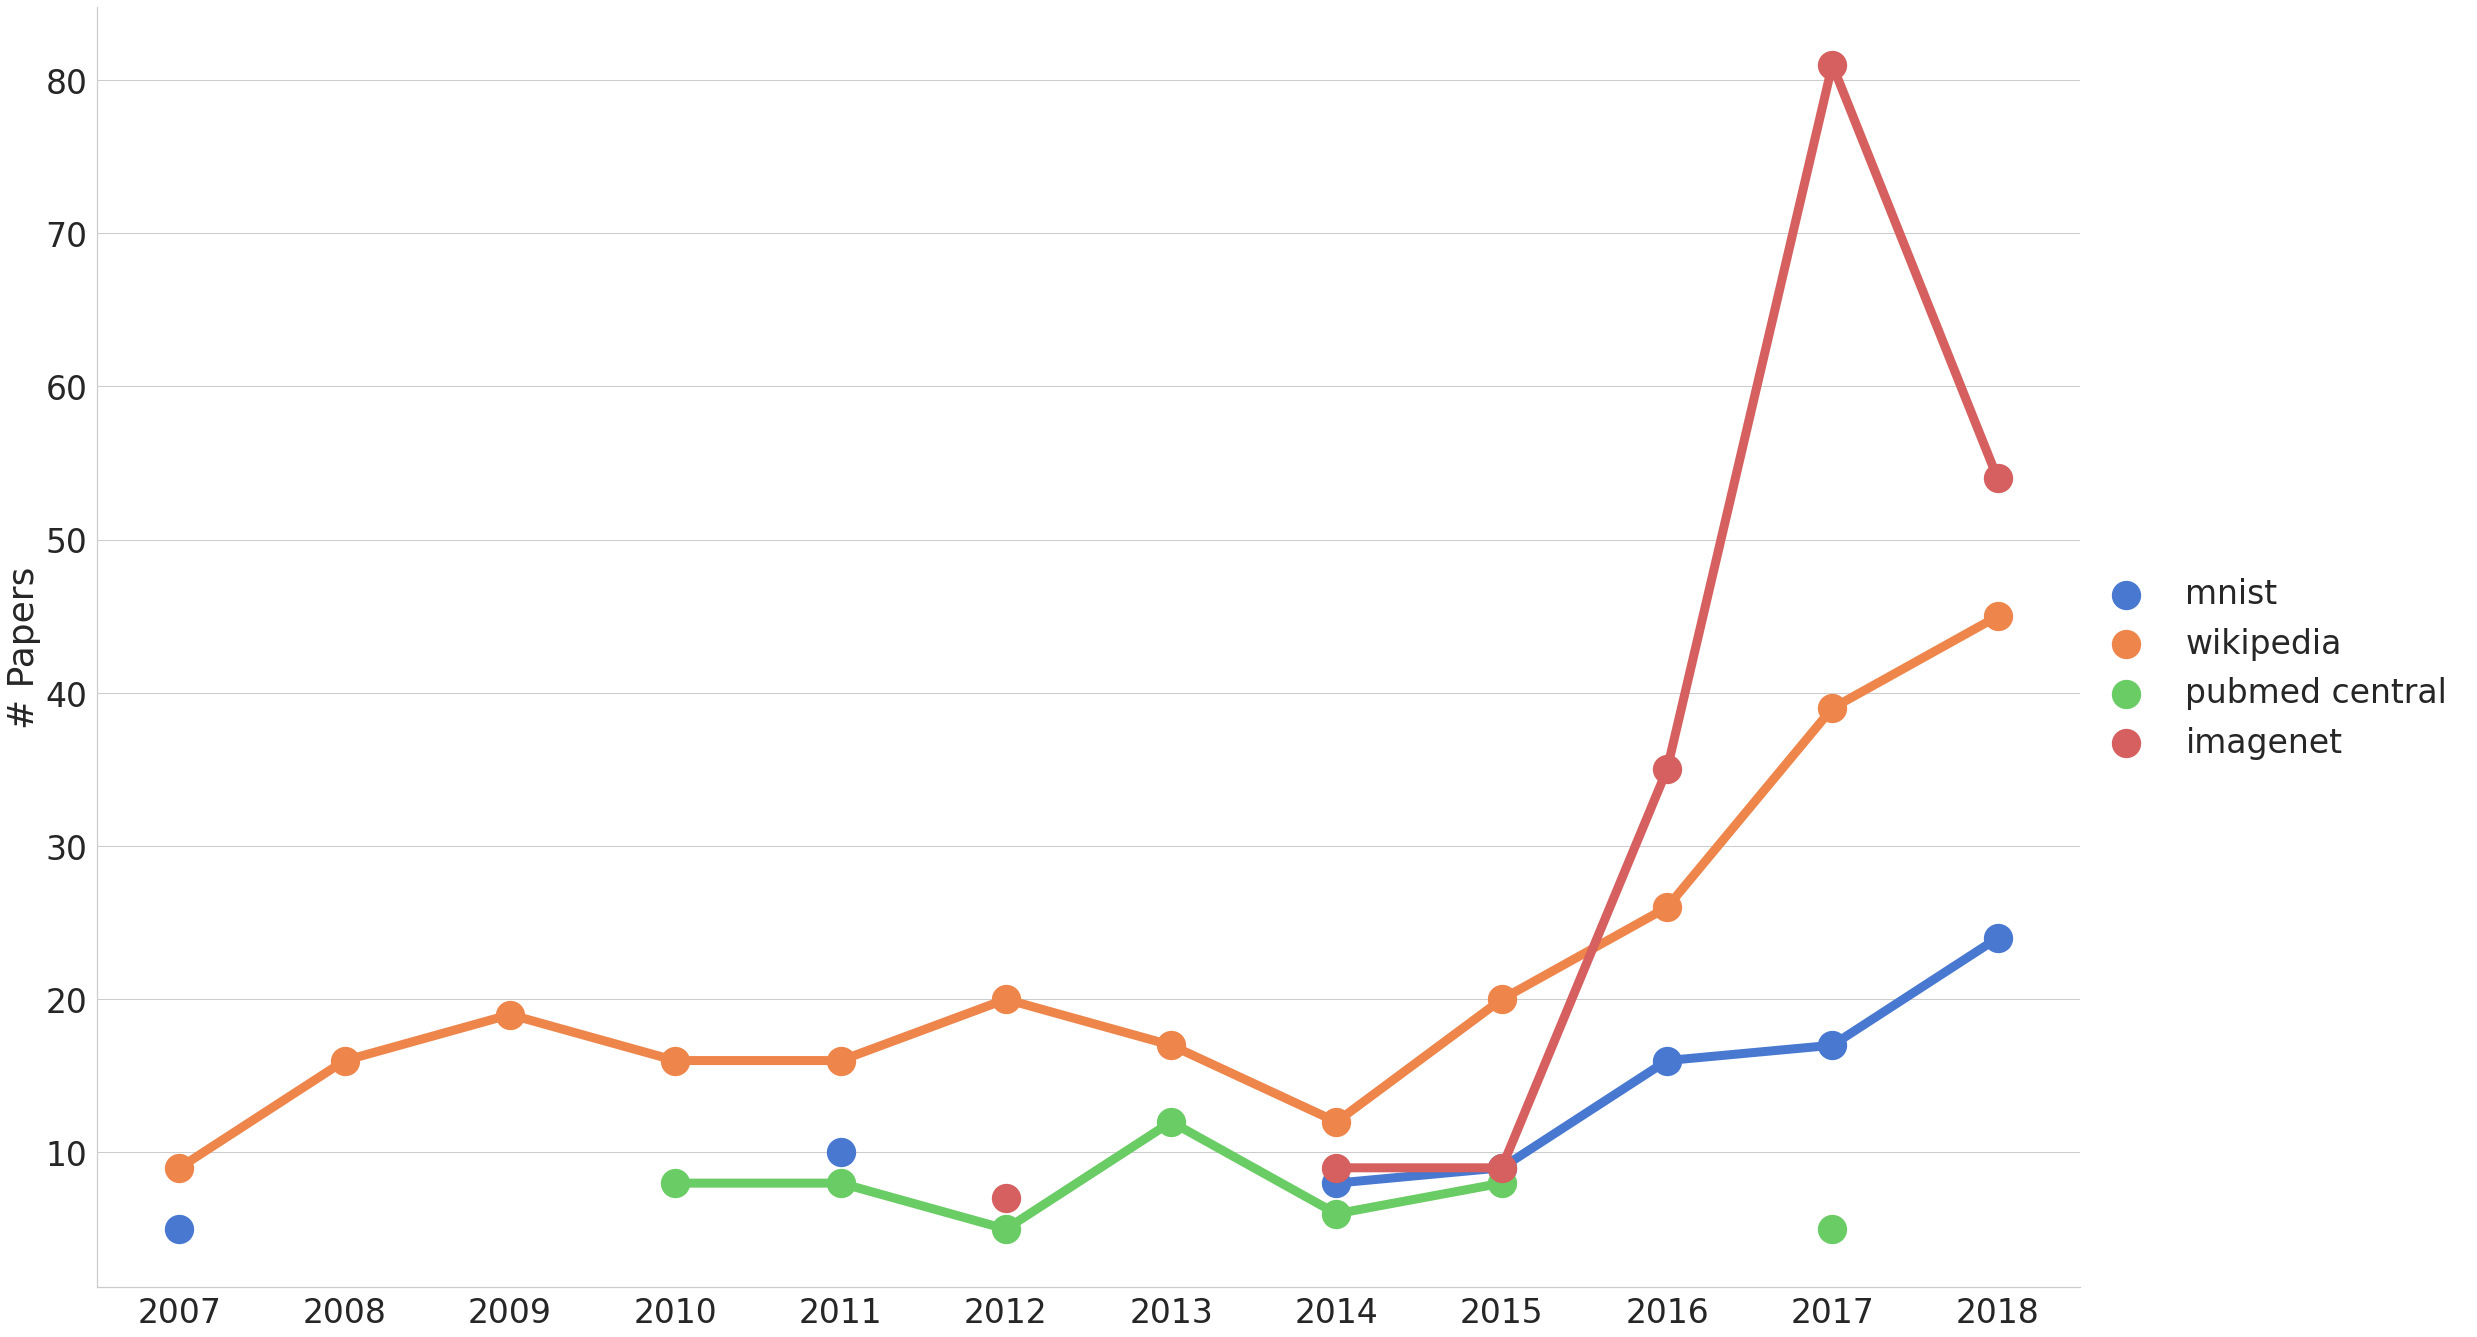

In [85]:
sns.set(style="whitegrid", font_scale=3, rc={"lines.linewidth": 5})
g = sns.catplot(x="published_year", y="count", hue="method", data=data,
                kind="point", height=20, aspect=1.5, palette=sns.color_palette("muted"))
g.set_axis_labels("", "# Papers")
g._legend.set_title("")

---
## 2. Field of study

In [ ]:
fos = pd.read_csv('fieldsofstudy.csv')
fos

In [ ]:
fos['count'] = 1
fos.groupby('field_of_study').count().reset_index().sort_values('count', ascending=False)[:200]

#### Interesting topics:
* Pattern recognition
* Data mining
* (artificial neural network)
* Natural language processing
* Computer vision
* Cluster analysis
* Reinforcement learning
* Speech recognition

#### Steps:
1. Count FoS papers over years
2. Find most used entities of selected papers
3. Plot most used entities over years

### 1. Pattern recognition

In [ ]:
topics = ['Pattern recognition', 'Data mining', 'Natural language processing', 'Computer vision',
          'Speech recognition', 'Reinforcement learning', 'Cluster analysis']
topic_methods = [
    ['artificial neural network', 'support vector machine', 'decision tree', 'feature space'],
    ['artificial neural network', 'support vector machine', 'decision tree', 'feature selection', 'information retrieval', 'social network', 'machine learning'],
    ['information retrieval', 'artificial neural network', 'support vector machine', 'convolutional neural network', 'bert'],
    ['artificial neural network', 'support vector machine', 'convolutional neural network', 'feature extraction', 'image processing'],
    ['artificial neural network', 'support vector machine', 'feature extraction', 'hidden markov model', 'signal processing'],
    ['artificial neural network', 'markov decision process', 'multiagent', 'value function', 'monte carlo', 'deep reinforcement leanrning'],
    ['machine learning', 'data mining', 'artificial neural network', 'support vector machine', 'euclidean distance', 'pairwise', 'hierarchical clustering']
]
for topic, topic_methods in zip(topics, topic_methods):
    documents = fos[fos['field_of_study'] == topic].drop(['field_of_study', 'count'], axis=1)
    documents = documents.merge(entities_years, on='document_id')
    
    # Show Word Cloud
    #wc = WordCloud(background_color="white", width=2000, height=1000)
    #wc.generate(' '.join(documents['method'].values))
    #plt.figure(figsize=(20, 10))
    #plt.axis('off')
    #plt.imshow(wc)
    #plt.show()
    
    # Plot count over years
    years = documents.drop('method', axis=1).drop_duplicates(subset='document_id', keep="first").drop('document_id', axis=1).groupby(['published_year']).sum().reset_index()
    #years.plot(x='published_year', y='count', figsize=(20, 10), title=topic)
    #sns.set(style="whitegrid", rc={"lines.linewidth": 2})
    #g = sns.lineplot(x="published_year", y="count", data=years, markers=True)
    
    # Select top entities over years
    df2 = documents.drop('document_id', axis=1).groupby(['method', 'published_year']).sum().reset_index().sort_values('published_year')
    #top_methods = df2.drop('published_year', axis=1).groupby('method').sum().reset_index()
    #top_methods = top_methods[top_methods['method'].str.lower() != topic.lower()]
    #top_methods = top_methods.sort_values('count', ascending=False)
    #data = top_methods[:10].merge(df2, how='left', on='method').drop('count_x', axis=1).rename(columns={'count_y': 'count'})
    #data = data.groupby('method').sum().reset_index()
    
    data = df2[df2['method'].isin(topic_methods)]
    data = data.merge(years, on='published_year')
    data['count_rel'] = data['count_x'] / data['count_y'] * 100
        
    # Plot used entities over years
    sns.set(style="whitegrid", font_scale=3, rc={"lines.linewidth": 5})
    g = sns.catplot(x="published_year", y="count_rel", hue="method", data=data,
                    kind="point", height=20, aspect=1.5, palette=sns.color_palette("muted"))
    g.set_axis_labels("", "% of Papers")
    g.set(title=topic)
    g._legend.set_title("")

In [ ]:
topic = "Pattern recognition"
documents = fos[fos['field_of_study'] == topic].drop(['field_of_study', 'count'], axis=1)
documents = documents.merge(entities_years, on='document_id')
documents

In [ ]:
wc = WordCloud(background_color="white", width=2000, height=1000)
wc.generate(' '.join(documents['method'].values))
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
#documents = documents[documents['published_year'] < 2018]
years = documents.drop('method', axis=1).drop_duplicates(subset='document_id', keep="first").drop('document_id', axis=1).groupby(['published_year']).sum().reset_index()
sns.set(style="whitegrid", rc={"lines.linewidth": 2})
g = sns.lineplot(x="published_year", y="count", data=years, markers=True)
years
#g.set_axis_labels("", "# Papers")

In [ ]:
df2 = documents.drop('document_id', axis=1).groupby(['method', 'published_year']).sum().reset_index().sort_values('published_year')
#df2 = df2[df2['count'] >= 5]
df2

In [ ]:
top_methods = df2.drop('published_year', axis=1).groupby('method').sum().reset_index()
top_methods = top_methods.sort_values('count', ascending=False)
top_methods[:200]

### Select subset of entities

In [ ]:
top_methods[:10].merge(df2, how='left', on='method').drop('count_x', axis=1).rename(columns={'count_y': 'count'})

In [ ]:
entities = ["artificial neural network", "support vector machine", "random forest",
            "decision tree", "neurest neighbor", "logistic regression", "naive bayes"]
data = df2[df2['method'].isin(entities)]
data = data.merge(years, on='published_year')
data['count_rel'] = data['count_x'] / data['count_y'] * 100
df2[df2['method'].str.contains('|'.join(entities), regex=True)].drop('published_year', axis=1).groupby('method').sum().sort_values('count', ascending=False)[:200]
#data.groupby('method').sum().sort_values('count', ascending=False)

### Plot number of documents which used a specific entity over time

In [ ]:
data = data.sort_values('method')
sns.set(style="whitegrid", font_scale=3, rc={"lines.linewidth": 5})
g = sns.catplot(x="published_year", y="count_rel", hue="method", data=data,
                kind="point", height=20, aspect=1.5, palette=sns.color_palette("muted"), hue_order=entities)
g.set_axis_labels("", "% of papers")
g._legend.set_title("")

# Computer vision

In [ ]:
topic = "Computer vision"
documents = fos[fos['field_of_study'] == topic].drop(['field_of_study', 'count'], axis=1)
documents = documents.merge(entities_years, on='document_id')

In [ ]:
wc = WordCloud(background_color="white", width=2000, height=1000)
wc.generate(' '.join(documents['method'].values))
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
#documents = documents[documents['published_year'] < 2018]
years = documents.drop('method', axis=1).drop_duplicates(subset='document_id', keep="first").drop('document_id', axis=1).groupby(['published_year']).sum().reset_index()
sns.set(style="whitegrid", rc={"lines.linewidth": 2})
g = sns.lineplot(x="published_year", y="count", data=years, markers=True)
years
#g.set_axis_labels("", "# Papers")

In [ ]:
df2 = documents.drop('document_id', axis=1).groupby(['method', 'published_year']).sum().reset_index().sort_values('published_year')
#df2 = df2[df2['count'] >= 5]
df2

In [ ]:
top_methods = df2.drop('published_year', axis=1).groupby('method').sum().reset_index()
top_methods = top_methods.sort_values('count', ascending=False)
top_methods[:200]

### Select subset of entities

In [ ]:
top_methods[:10].merge(df2, how='left', on='method').drop('count_x', axis=1).rename(columns={'count_y': 'count'})

In [ ]:
data.merge(years, on='published_year')

In [ ]:
entities = ['artificial neural network', 'support vector machine', 'convolutional neural network', 'principal component analysis']
            #'feature extraction', 'image segmentation', ]
data = df2[df2['method'].isin(entities)]
data = data.merge(years, on='published_year')
data['count_rel'] = data['count_x'] / data['count_y'] * 100
data
#df2[df2['method'].str.contains('|'.join(entities), regex=True)].drop('published_year', axis=1).groupby('method').sum().sort_values('count', ascending=False)[:200]
#data.groupby('method').sum().sort_values('count', ascending=False)

### Plot number of documents which used a specific entity over time

In [ ]:
data = data.sort_values('method')
sns.set(style="whitegrid", font_scale=3, rc={"lines.linewidth": 5})
g = sns.catplot(x="published_year", y="count_rel", hue="method", data=data,
                kind="point", height=20, aspect=1.5, palette=sns.color_palette("muted"), hue_order=entities)
g.set_axis_labels("", "% of papers")
g._legend.set_title("")

In [ ]:
data = data.sort_values(['method', 'published_year'])[['method', 'published_year', 'count_rel']]

data.to_csv('computer_vision.csv')